# Linear Regression

Import required libraries
    pandas - to work with data from csv file
    numpy - to work with array
    matplotlib - visualization of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the CSV file as dataframe
df = pd.read_csv("Advertising.csv")
df.head() #display the first 5 rows of the dataframe

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


TV, radio and newspaper - independent variables (input variables)
Sales - dependent variables (output variable)

# Considering single input - TV

First we will try to generate the equation of line without the use of any libraries

In [3]:
df['TV'] #returns the columns values in float

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [4]:
df[['TV']] #returns a dataframe

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [5]:
df[['TV']].values #converts the dataframe into a numpy array

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

Value-by-value multiplication is not possible in pandas dataframe
So we need to convert it into a numpy array

In [6]:
X = df[['TV']].values #array of dependent variable
Y = df[['sales']].values #array of independent variable

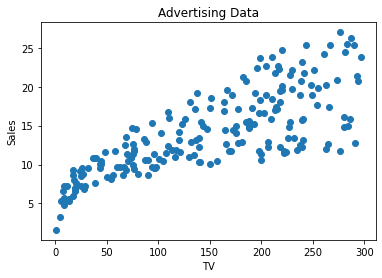

In [7]:
#Let us visualize the data first
plt.scatter(X,Y) #plot a scatter plot
plt.xlabel("TV") #set label of x-axis
plt.ylabel("Sales") #set label of y-axis
plt.title("Advertising Data") #set title of the plot
plt.show()

Data seems to be very related - as the values of spendings on TV increase, so does the sales

In [8]:
#Generate the mean of both input and output
x_mean = X.mean()
y_mean = Y.mean()
print(x_mean,y_mean)

147.0425 14.0225


In [9]:
#Find the intercept and slope of the line
num = ((X-x_mean)*(Y-y_mean)).sum() #numerator
den = ((X-x_mean)**2).sum() #denominator
m = num/den #slope
c = y_mean - m*x_mean #intercept
print(m)
print(c)

0.047536640433019736
7.0325935491276965


In [10]:
#Generating the best fit line using the m and c found and plotting it
Yp = m*X + c

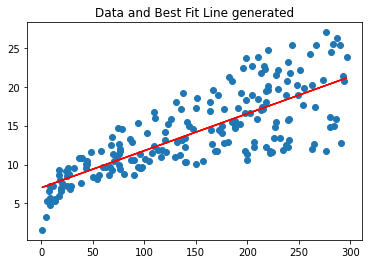

In [11]:
#Visualize the best fit line generated along with the data
plt.plot(X,Yp,c='r') #best fit line
plt.scatter(X,Y) #data
plt.title("Data and Best Fit Line generated")
plt.show()

In [12]:
#to see the difference between Y and predicted value of Y
np.hstack((Y,Yp))

array([[22.1       , 17.97077451],
       [10.4       ,  9.14797405],
       [ 9.3       ,  7.85022376],
       [18.5       , 14.23439457],
       [12.9       , 15.62721814],
       [ 7.2       ,  7.44616232],
       [11.8       ,  9.76595037],
       [13.2       , 12.74649773],
       [ 4.8       ,  7.44140866],
       [10.6       , 16.53041431],
       [ 8.6       , 10.17476548],
       [17.4       , 17.23871025],
       [ 9.2       ,  8.16396559],
       [ 9.7       , 11.66741599],
       [19.        , 16.73482186],
       [22.4       , 16.32125309],
       [12.5       , 10.25557777],
       [24.4       , 20.40940417],
       [11.3       , 10.32212907],
       [14.6       , 14.03474068],
       [18.        , 17.41459582],
       [12.5       , 18.31779199],
       [ 5.6       ,  7.6600772 ],
       [15.5       , 17.88520856],
       [ 9.7       ,  9.99412625],
       [12.        , 19.52997632],
       [15.        , 13.82557947],
       [15.9       , 18.44614092],
       [18.9       ,

In [13]:
#error value
np.abs(Y - Yp).mean()

2.549806038927486

Now we will generate the best fit line using scikit-learn library

In [14]:
#build the model
from sklearn.linear_model import LinearRegression #import library
lmodel1 = LinearRegression() #create an object

In [15]:
#train the model
lmodel1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#to print the coefficients
print(lmodel1.coef_) #coefficient/slope
print(lmodel1.intercept_) #intercept

[[0.04753664]]
[7.03259355]


In [17]:
#make predictions
Yp = lmodel1.predict(X)

In [18]:
#to calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mean1 = mean_absolute_error(Y,Yp)
print(mean1)

2.549806038927486


We can see that the slope, intercept and the error generated both ways are the same.

In [19]:
#make predictions on the model
#if the company spends 56.5 on TV we can find the sales value with the model generated
lmodel1.predict([[56.5]]) #uses the coefficients generated before

array([[9.71841373]])

This shows that if we spend 56.5 on TV, the sales value will be around 9.72

# Considering 2 inputs - TV and Radio

We are trying to fit a plane to the data points

In [20]:
X = df[['TV','radio']] #independent variable
Y = df[['sales']] #dependent variable
lmodel2 = LinearRegression() #Create an object
lmodel2.fit(X,Y) #train the model
Yp = lmodel2.predict(X) #generate predictions
print("Coefficients: ",lmodel2.coef_) #coefficient/slope
print("Intercept: ",lmodel2.intercept_) #intercept
mean2 = mean_absolute_error(Y,Yp) #mean absolute error
print("Error: ",mean2)

Coefficients:  [[0.04575482 0.18799423]]
Intercept:  [2.92109991]
Error:  1.2537471644234004


We can see the two different coefficients for the two different inputs
So, the first coefficient is for TV and second for Radio

In [21]:
#Comparing the errors of the two cases
print("Error with single input (TV): ",mean1)
print("Error with 2 inputs (TV and radio): ",mean2)

Error with single input (TV):  2.549806038927486
Error with 2 inputs (TV and radio):  1.2537471644234004


We can see clearly that the mean absolute error is almost half when we conider radio also.

# Considering 3 inputs - TV, Radio and Newspaper

In [22]:
X = df[['TV','radio','newspaper']] #independent variable
Y = df[['sales']] #dependent variable
lmodel3 = LinearRegression() #generate linear regression model/object
lmodel3.fit(X,Y) #fit/train the model
Yp = lmodel3.predict(X) #predict results using the trained model
print("Coefficients: ",lmodel3.coef_) #coefficient/slope
print("Intercept: ",lmodel3.intercept_) #intercept
mean3 = mean_absolute_error(Y,Yp) #mean absolute error
print("Error: ",mean3)

Coefficients:  [[ 0.04576465  0.18853002 -0.00103749]]
Intercept:  [2.93888937]
Error:  1.2520112296870682


We can see the coefficient for newspaper is negative

In [23]:
#Comparing the errors of the three cases
print("Error with TV - ",(mean1))
print("Error with TV and radio - ",(mean2))
print("Error with TV, radio and newspaper - ",(mean3))

Error with TV -  2.549806038927486
Error with TV and radio -  1.2537471644234004
Error with TV, radio and newspaper -  1.2520112296870682


Adding newspaper as input variable does not change the error much. This implies newspaper has no role in decreasing the error. Therefore, there is no role of newspaper in the sales.

In [24]:
#Comapring the three cases to show that newspaper has no effect on sales
print(lmodel1.predict([[35.8]]))
print(lmodel2.predict([[35.8,45.2]]))
print(lmodel3.predict([[35.8,45.2,100.6]]))

[[8.73440528]]
[[13.05646134]]
[[12.99444864]]


# Correlation

In [25]:
#Correlation Matrix
df = df[['TV','radio','newspaper','sales']]
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


This shows correlation between each and every variable present in the dataframe

# Understanding Correlation using graphics

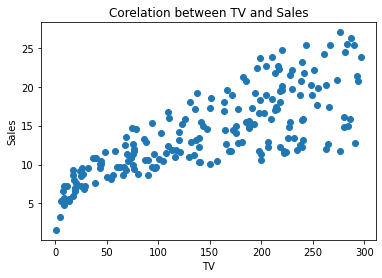

In [26]:
plt.scatter(df['TV'],df['sales'])
plt.xlabel("TV") #set label of x-axis
plt.ylabel("Sales") #set label of y-axis
plt.title("Corelation between TV and Sales") #set title of the plot
plt.show()

Shows that TV and sales have some similarity.

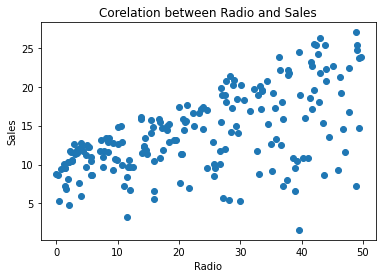

In [27]:
plt.scatter(df['radio'],df['sales'])
plt.xlabel("Radio") #set label of x-axis
plt.ylabel("Sales") #set label of y-axis
plt.title("Corelation between Radio and Sales") #set title of the plot
plt.show()

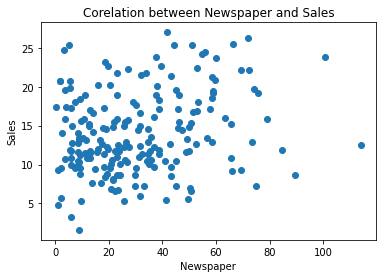

In [28]:
plt.scatter(df['newspaper'],df['sales'])
plt.xlabel("Newspaper") #set label of x-axis
plt.ylabel("Sales") #set label of y-axis
plt.title("Corelation between Newspaper and Sales") #set title of the plot
plt.show()

The plot between newspaper and sales in very scattered. This shows there is simply no relation between them.